In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

In [4]:
import numpy as np

In [5]:
import pandas as pd
import os
import glob

In [10]:
dir_list = ["1_1","1_2","2_1","2_2","3_1","3_2"]

In [11]:
test_dir_list = ["1_3","1_4","1_5","1_6","1_7","2_3","2_4","2_5","2_6","2_7","3_3"]

### setting 1

In [9]:
index = 1
all_df = pd.DataFrame()
for i in dir_list:
    if "1_" in i:
        acc_one = pd.read_csv("wavs  (rul)fe_"+i+"_acc.csv")
        acc_one["id"] = index
        index += 1
        all_df = pd.concat([all_df, acc_one],axis=0)

NameError: name 'dir_list' is not defined

In [7]:
one_train = all_df.copy()

In [9]:
index = 1
all_df = pd.DataFrame()
for i in test_dir_list:
    if "1_" in i:
        acc_one = pd.read_csv("wavs  (rul)fe_"+i+"_acc.csv")
        acc_one["id"] = index
        index += 1
        all_df = pd.concat([all_df, acc_one],axis=0)

In [10]:
one_test = all_df.copy()

In [17]:
one_train = clean_dataset(one_train)

In [18]:
one_test = clean_dataset(one_test)

In [11]:
one_train.to_csv("one_train.csv",index=None)

In [12]:
one_test.to_csv("one_test.csv",index=None)

In [13]:
one_train = one_train.reset_index()
one_test = one_test.reset_index()

In [14]:
one_train.shape

(940544, 141)

In [15]:
one_test.shape

(2759424, 141)

In [28]:
one_train

,Unnamed: 0,Horiz_acc,id,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,crest_horiz,...,f184_sum,f192_sum,f200_sum,f208_sum,f216_sum,f224_sum,f232_sum,f240_sum,f248_sum,f256_sum
0,9,0.257,1,0.257000,0.000000,0.257,0.257000,0.000000,-3.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,0.173,1,0.215000,0.059397,0.257,0.219064,0.000000,-2.000000,1.173174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,-0.426,1,0.001333,0.372457,0.257,0.304113,-1.633467,-1.500000,0.845081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,0.231,1,0.058750,0.325069,0.257,0.287583,-1.931381,-0.698891,0.893656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,-0.157,1,0.015600,0.297593,0.257,0.266632,-1.000708,-1.203898,0.963874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940539,2229719,0.328,2,-0.078654,1.730453,3.344,1.698671,-0.596130,1.036508,1.968598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940540,2229729,-0.657,2,-0.060808,1.721644,3.344,1.689305,-0.631044,1.139150,1.979512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940541,2229739,-3.108,2,-0.210308,1.812186,3.344,1.789396,-0.482692,0.507112,1.868787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940542,2229749,-1.077,2,-0.178885,1.788755,3.344,1.763117,-0.527800,0.697830,1.896641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
one_train["RUL"]

0         28020.099605
1         28020.099214
2         28020.098824
3         28020.098433
4         28020.098042
              ...     
940539        0.001560
940540        0.001170
940541        0.000780
940542        0.000390
940543        0.000000
Name: RUL, Length: 940544, dtype: float64

In [50]:
pd.read_csv("1_1_temp_df.csv")

,Unnamed: 0,Hour,Minute,Second,0.x_Second,Rtd sensor,id,sum_0.x_second,RUL
0,0,9,40,47,5,70.378,1,348475,27951.6
1,1,9,40,47,6,70.378,1,348476,27951.5
2,2,9,40,47,7,70.397,1,348477,27951.4
3,3,9,40,47,8,70.397,1,348478,27951.3
4,4,9,40,47,9,70.418,1,348479,27951.2
...,...,...,...,...,...,...,...,...,...
279512,279512,17,26,38,7,164.340,466,627987,0.4
279513,279513,17,26,38,8,164.340,466,627988,0.3
279514,279514,17,26,38,9,164.360,466,627989,0.2
279515,279515,17,26,39,0,164.360,466,627990,0.1


In [53]:
pd.read_csv("fe_1_2_temp.csv")

,Unnamed: 0,Rtd sensor,id,av_temp,sd_temp,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp
0,0,57.181,1,57.181000,0.000000,57.181,57.181000,0.000000,-3.000000,1.000000,1.000000,1.0,1.000000
1,1,57.181,1,57.181000,0.000000,57.181,57.181000,0.000000,-3.000000,1.000000,1.000000,1.0,1.000000
2,2,57.208,1,57.190000,0.015588,57.208,57.190001,1.732087,-1.500000,1.000315,1.000315,1.0,1.000315
3,3,57.208,1,57.194500,0.015588,57.208,57.194502,0.000025,-2.000000,1.000236,1.000236,1.0,1.000236
4,4,57.235,1,57.202600,0.022590,57.235,57.202604,0.512243,-1.153061,1.000566,1.000566,1.0,1.000566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86391,86391,103.916,1,103.915000,0.005049,103.922,103.915000,-0.150302,-1.098051,1.000067,1.000067,1.0,1.000067
86392,86392,103.919,1,103.915033,0.005069,103.922,103.915033,-0.165733,-1.113479,1.000067,1.000067,1.0,1.000067
86393,86393,103.919,1,103.915067,0.005089,103.922,103.915067,-0.178111,-1.128189,1.000067,1.000067,1.0,1.000067
86394,86394,103.919,1,103.915100,0.005108,103.922,103.915100,-0.192816,-1.142196,1.000066,1.000066,1.0,1.000066


In [6]:
both_train = ["1_1","1_2","2_1","3_1"]

In [7]:
both_test = ["1_4","1_5","1_6","1_7","2_4","2_5","3_3"]

In [71]:
index = 1
all_df = pd.DataFrame()
for i in both_train:
    if "3_" in i:
        temp_one = pd.read_csv("fe_"+i+"_temp.csv")
        temp_one["RUL"] = (temp_one["Unnamed: 0"].max() - temp_one["Unnamed: 0"])/10
        acc_one = pd.read_csv("wavs  (rul)fe_"+i+"_acc.csv")
        acc_one["round_RUL"] = np.round(acc_one["RUL"],1)
        combine_one = acc_one.merge(temp_one,left_on="round_RUL",right_on="RUL",how="left")
        combine_one = combine_one.dropna()
        combine_one["id"] = index
        index += 1
        all_df = pd.concat([all_df, combine_one],axis=0)

In [72]:
one_train_combine = all_df
one_train_combine = clean_dataset(one_train_combine)

In [73]:
one_train_combine.to_csv("three_test_combine.csv",index=None)

In [8]:
index = 1
all_df = pd.DataFrame()
for i in both_test:
    if "3_" in i:
        temp_one = pd.read_csv("fe_"+i+"_temp.csv")
        temp_one["RUL"] = (temp_one["Unnamed: 0"].max() - temp_one["Unnamed: 0"])/10
        acc_one = pd.read_csv("wavs  (rul)fe_"+i+"_acc.csv")
        acc_one["round_RUL"] = np.round(acc_one["RUL"],1)
        combine_one = acc_one.merge(temp_one,left_on="round_RUL",right_on="RUL",how="left")
        combine_one = combine_one.dropna()
        combine_one["id"] = index
        index += 1
        all_df = pd.concat([all_df, combine_one],axis=0)

In [10]:
one_test_combine = all_df
one_test_combine = clean_dataset(one_test_combine)


In [11]:
one_test_combine.to_csv("three_train_combine.csv",index=None)

In [ ]:
one_train

### setting 2

In [13]:
index = 1
all_df = pd.DataFrame()
for i in dir_list:
    if "2_" in i:
        acc_one = pd.read_csv("wavs  (rul)fe_"+i+"_acc.csv")
        acc_one["id"] = index
        index += 1
        all_df = pd.concat([all_df, acc_one],axis=0)

In [14]:
two_train = all_df.copy()

In [15]:
index = 1
all_df = pd.DataFrame()
for i in test_dir_list:
    if "2_" in i:
        acc_one = pd.read_csv("wavs  (rul)fe_"+i+"_acc.csv")
        acc_one["id"] = index
        index += 1
        all_df = pd.concat([all_df, acc_one],axis=0)

In [16]:
two_test = all_df.copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [18]:
two_train = clean_dataset(two_train)
two_test = clean_dataset(two_test)

In [20]:
two_train = two_train.reset_index()
two_test = two_test.reset_index()

In [21]:
two_train.to_csv("two_train.csv",index=None)
two_test.to_csv("two_test.csv",index=None)

In [29]:
two_train

,index,Unnamed: 0,Horiz_acc,id,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,...,f184_sum,f192_sum,f200_sum,f208_sum,f216_sum,f224_sum,f232_sum,f240_sum,f248_sum,f256_sum
0,3,39.0,0.427,1.0,-0.196000,0.461206,0.427,0.444915,1.059143,-1.218528,...,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4,49.0,-0.341,1.0,-0.225000,0.404646,0.427,0.426164,1.320087,-0.635656,...,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5,59.0,0.635,1.0,-0.081667,0.504239,0.635,0.467494,0.659047,-1.406848,...,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,6,69.0,-0.121,1.0,-0.087286,0.460546,0.635,0.435225,0.723868,-1.116786,...,0.0,0.0,0.000000,0.00000,0.00000,0.167382,0.167382,0.229148,0.229148,0.229148
4,7,79.0,0.488,1.0,-0.015375,0.472410,0.635,0.442166,0.277223,-1.516947,...,0.0,0.0,0.048721,0.09834,0.09834,0.035861,0.035861,0.102535,0.102535,0.102535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437239,204027,2040279.0,0.397,2.0,0.086308,1.224550,2.277,1.203868,-0.653156,0.326459,...,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
437240,204028,2040289.0,1.474,2.0,0.154077,1.251467,2.277,1.236799,-0.727844,0.244974,...,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
437241,204029,2040299.0,-0.173,2.0,0.128731,1.251149,2.277,1.233588,-0.664134,0.194037,...,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
437242,204030,2040309.0,0.689,2.0,0.153731,1.255770,2.277,1.240943,-0.717675,0.201322,...,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
one_train = pd.read_csv("one_train_combine.csv")
one_test = pd.read_csv("one_test_combine.csv")

In [12]:
one_train

,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,crest_horiz,...,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id
0,17929.0,0.204,1.0,-0.000808,0.522451,1.185,0.512306,0.452596,-0.062617,2.313069,...,70.516,70.447515,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0
1,17939.0,0.273,1.0,-0.002846,0.521227,1.185,0.511113,0.464104,-0.031312,2.318469,...,70.516,70.447515,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0
2,17949.0,0.857,1.0,0.049308,0.537192,1.185,0.529063,0.319226,-0.303938,2.239808,...,70.516,70.447515,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0
3,17959.0,-0.116,1.0,0.034231,0.536075,1.185,0.526778,0.408109,-0.243211,2.249523,...,70.516,70.447515,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0
4,17969.0,0.627,1.0,0.012769,0.497978,1.043,0.488474,0.187612,-0.381098,2.135220,...,70.516,70.447515,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936442,2229719.0,0.328,1.0,-0.078654,1.730453,3.344,1.698671,-0.596130,1.036508,1.968598,...,103.922,103.915133,-0.207950,-1.155515,1.000066,1.000066,1.0,1.000066,0.0,2.0
936443,2229729.0,-0.657,1.0,-0.060808,1.721644,3.344,1.689305,-0.631044,1.139150,1.979512,...,103.922,103.915133,-0.207950,-1.155515,1.000066,1.000066,1.0,1.000066,0.0,2.0
936444,2229739.0,-3.108,1.0,-0.210308,1.812186,3.344,1.789396,-0.482692,0.507112,1.868787,...,103.922,103.915133,-0.207950,-1.155515,1.000066,1.000066,1.0,1.000066,0.0,2.0
936445,2229749.0,-1.077,1.0,-0.178885,1.788755,3.344,1.763117,-0.527800,0.697830,1.896641,...,103.922,103.915133,-0.207950,-1.155515,1.000066,1.000066,1.0,1.000066,0.0,2.0


In [137]:
for i in one_train_combine.columns:
    if "index" in i :
        print(i)

In [13]:
one_train_combine = one_train.reset_index()
one_test_combine = one_test.reset_index()

In [35]:
X_train = one_train_combine.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id_x","id.1","id.2"], axis=1)
X_test = one_test_combine.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id_x","id.1","id.2"], axis=1)
y_train = one_train_combine["RUL_x"]
y_test = one_test_combine["RUL_x"]

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
from sklearn.metrics import mean_squared_error

In [36]:
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))

MSE training: 9591360.440, MSE testing: 1017204145.191
RMSE training: 3096.992, RMSE testing: 31893.638


In [21]:
def plot_features_weights(model, weights, feature_names):
    

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py))
    plt.xlabel(model)
    plt.gca().legend_ = None

In [22]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize=(20,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=y_train.max()+50, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

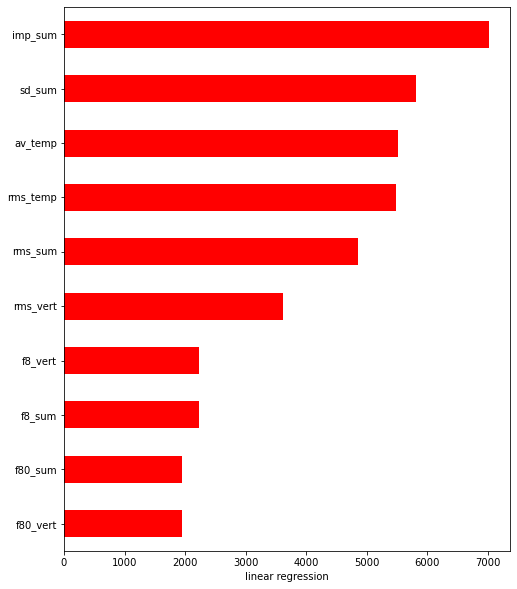

In [38]:
plot_features_weights('linear regression',lr.coef_, X_train.columns)

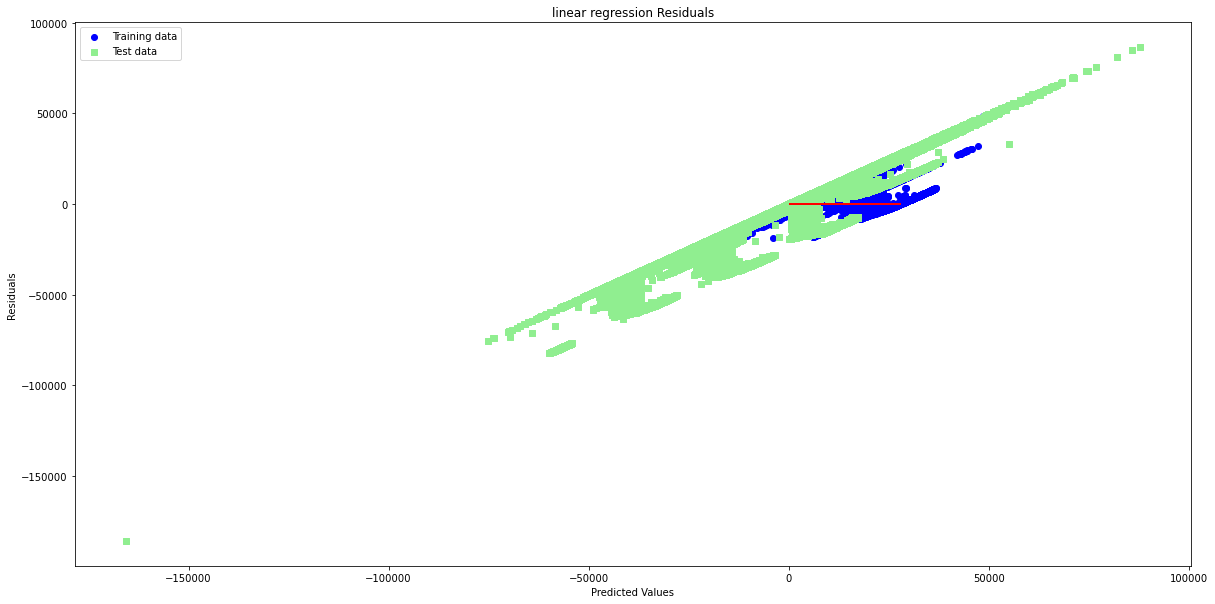

In [39]:
plot_residual('linear regression',y_train, y_train_predict, y_test, y_test_predict)

In [40]:
y_train_predict

array([35263.66904458, 35464.92521497, 35138.16808002, ...,
        6481.5423209 ,  7185.1699429 ,  5991.71113734])

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dt = DecisionTreeRegressor(random_state=0,max_depth=5)
dt.fit(X_test, y_test)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [57]:
y_test_predict = dt.predict(X_test)
y_train_predict = dt.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 61419444.061, MSE testing: 14280794.121
RMSE training: 7837.056, RMSE testing: 3778.994
MAE training: 5996.962, MAE testing: 2690.264


In [48]:
rf = RandomForestRegressor(random_state=0,max_depth=6,n_estimators=200,min_samples_split=1000,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=1000, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 1086804.949, MSE testing: 73077680.658
RMSE training: 1042.499, RMSE testing: 8548.548
MAE training: 645.092, MAE testing: 6971.695


In [43]:
from sklearn.metrics import mean_absolute_error

In [49]:
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 1335.164, MAE testing: 5496.720


In [44]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 1081646.806, MSE testing: 73065622.374
RMSE training: 1040.023, RMSE testing: 8547.843
MAE training: 642.423, MAE testing: 6972.003


In [49]:
ans_df = pd.DataFrame(y_train)

In [50]:
ans_df["rf_predict"] = y_train_predict

In [67]:

train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 4385.278, MAE testing: 5756.707


In [73]:
y_train = ans_df[ans_df["RUL"]<500]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<500]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 1040.631, MAE testing: 5756.707


In [63]:
y_train = ans_df[ans_df["RUL"]<10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 3904.573, MAE testing: 5756.707


In [68]:
y_train = ans_df[ans_df["RUL"]>10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]>10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MAE training: 4883.032, MAE testing: 5756.707


In [61]:
ans_df[ans_df["RUL"]>10000]

,RUL,rf_predict
0,28020.099605,15356.027831
1,28020.099214,15176.099507
2,28020.098824,16848.654019
3,28020.098433,16848.654019
4,28020.098042,15657.801022
...,...,...
543227,28072.201560,7309.972206
543228,28072.201170,7266.249676
543229,28072.200780,6636.463772
543230,28072.200390,6423.953280


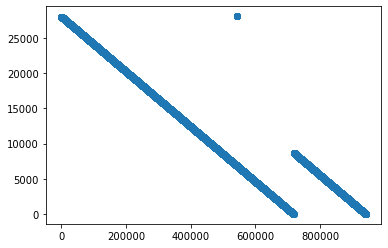

In [60]:
plt.scatter(ans_df.index,ans_df["RUL"])

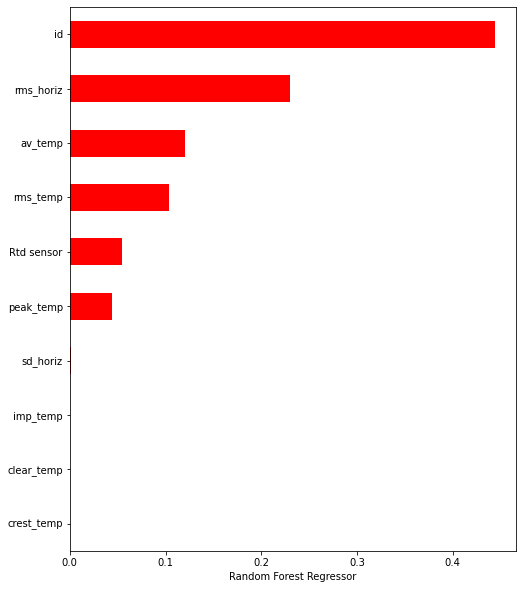

In [58]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns)

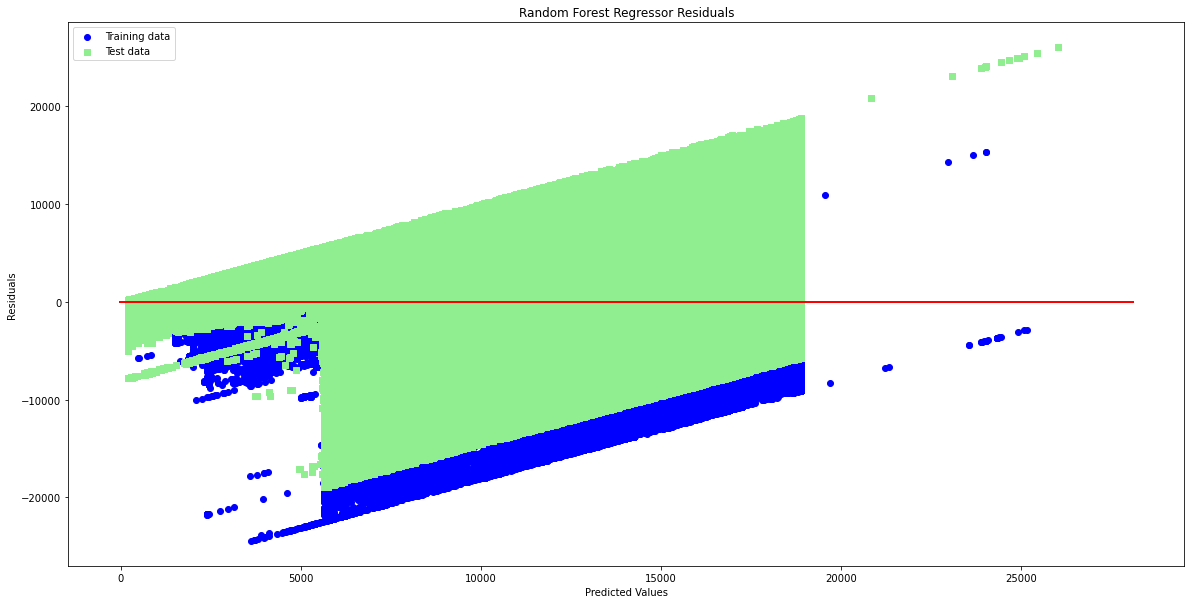

In [46]:
plot_residual('Random Forest Regressor',y_train, y_train_predict, y_test, y_test_predict)

In [150]:
y_train

0         28020.099605
1         28020.099214
2         28020.098824
3         28020.098433
4         28020.098042
              ...     
940538        0.001560
940539        0.001170
940540        0.000780
940541        0.000390
940542        0.000000
Name: RUL, Length: 940543, dtype: float64

In [149]:
y_train_predict 

array([15090.69924777, 14191.4132257 , 16939.07715585, ...,
         183.10801738,   183.10801738,   183.10801738])

In [ ]:
mean_absolute_percentage_error

In [36]:
X_train.isnull().values.any()

False

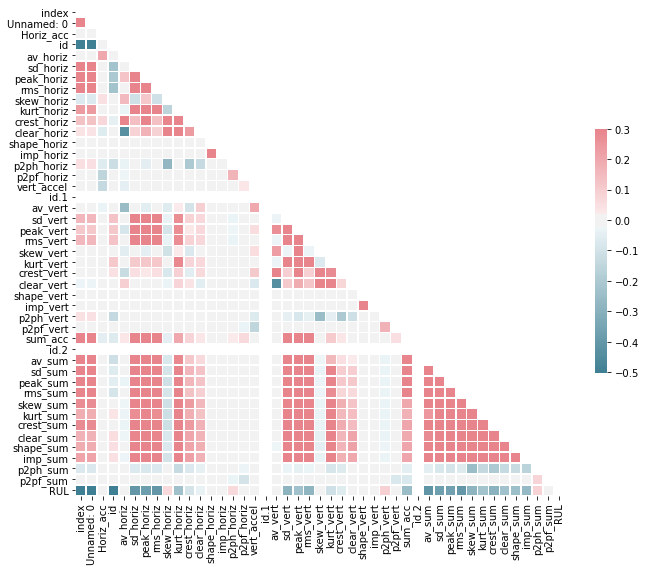

In [75]:
# 計算相關係數
corr = one_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

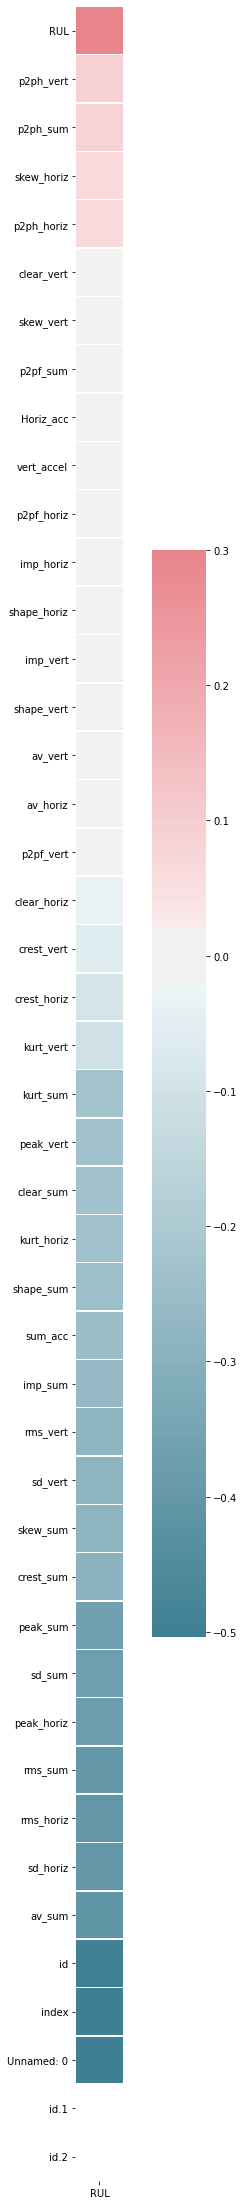

In [90]:
plt.figure(figsize=(10,40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.DataFrame(corr["RUL"].sort_values(ascending=False)), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

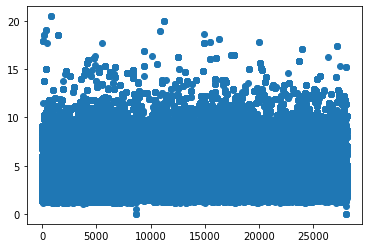

In [93]:
plt.scatter(one_train["RUL"],one_train["p2ph_vert"])

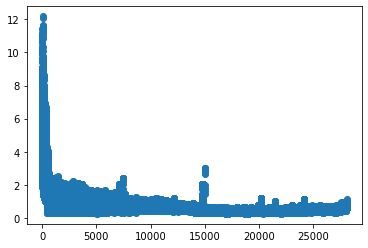

In [94]:
plt.scatter(one_train["RUL"],one_train["av_sum"])